In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

In [2]:
from utils.ecg_transforms import CenterCrop1D, AddGaussianNoise, AmplitudeScale1D, RandomRescale1D, RandomZeroOut1D

In [3]:
sns.set_theme(style='darkgrid')

In [4]:
H5_FILE = 'data/ptb_xl/processed/dataset.h5'

In [5]:
with h5py.File(H5_FILE, 'r') as hf:
    ecg_data = np.asarray(hf['ecg_data'])

In [6]:
ecg_data.shape

(21799, 1000, 12)

In [7]:
def visualize_transform(raw_signal, transform, channel=0, crop=128, crop_first=False):
    raw_signal = torch.tensor(raw_signal, dtype=torch.float32)
    center_crop = CenterCrop1D(target_size=crop)
    
    if crop_first:
        raw_signal = center_crop(raw_signal)
        transformed_signal = transform(raw_signal.clone())
    else:
        transformed_signal = transform(raw_signal.clone())
        transformed_signal = center_crop(transformed_signal)
        raw_signal = center_crop(raw_signal)

    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    ax.plot(raw_signal[:, channel], label=f"Original", alpha=0.8)#, linestyle="--")
    ax.plot(transformed_signal[:, channel], label=f"Transformed", alpha=0.8)
    ax.set_xlabel("Time Steps", fontsize=14)
    ax.set_ylabel("Amplitude", fontsize=14)
    ax.legend(fontsize=14, loc='upper right')
    ax.tick_params(axis='both', which='major', labelsize=14)

    return fig

In [8]:
transformations = [
    (AddGaussianNoise(mean=0.0, std=0.02), "gaussian_noise"),
    (AmplitudeScale1D(scale_range=(0.7, 0.7)), "amp_scale"),
    (RandomRescale1D(scale_range=(1.2, 1.2)), "temporal_rescale"),
    (RandomZeroOut1D(zero_ratio_range=(0.2, 0.2)), "random_zero"),
]

In [9]:
center_crop = CenterCrop1D(target_size=256)

In [10]:
sample_raw_signal = ecg_data[0]


gaussian_noise


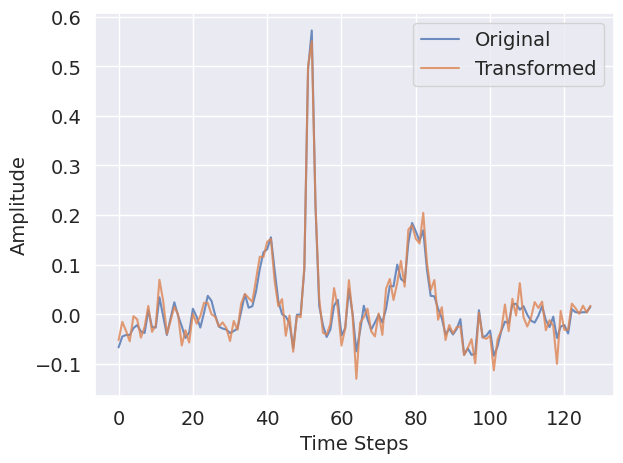

amp_scale


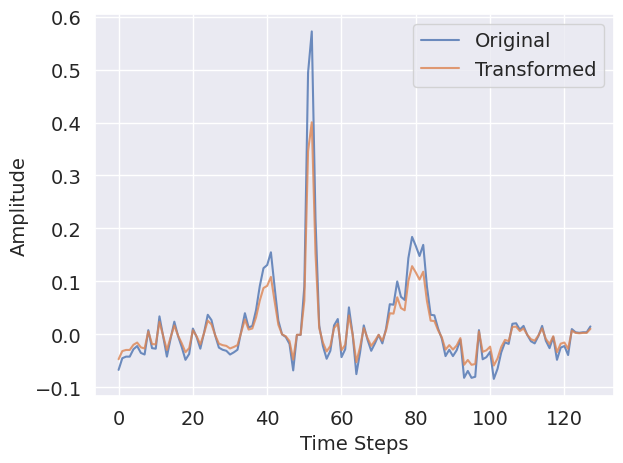

temporal_rescale


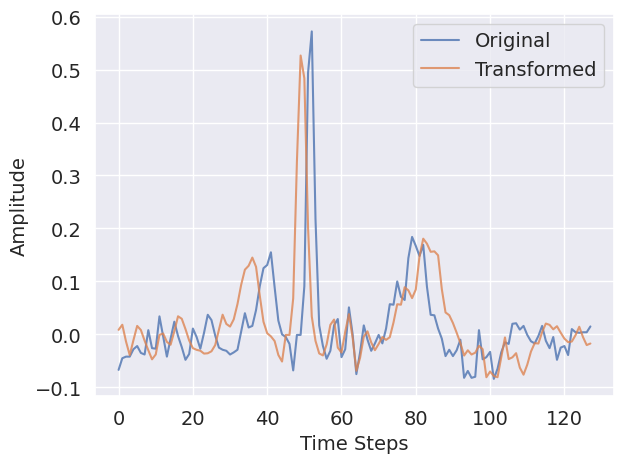

random_zero


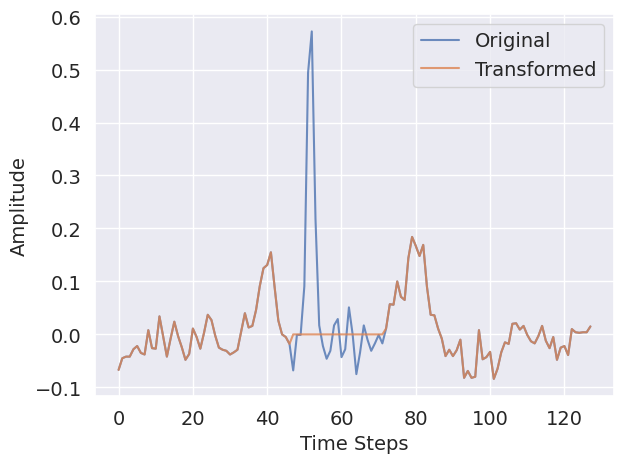

In [11]:
for transform, name in transformations:
    print(name)
    if name == 'random_zero':
        crop_first = True
    else:
        crop_first = False
    fig = visualize_transform(sample_raw_signal, transform, crop_first=crop_first)
    fig.tight_layout()
    plt.show()